<a href="https://colab.research.google.com/github/laistebas/analise_series_temporais/blob/main/analise_series_temporais_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
# Carregando dataset
dataset = pd.read_csv('/content/drive/MyDrive/Projetos/vendas.csv')

In [ ]:
dataset.shape

(365, 2)

In [ ]:
dataset.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [ ]:
dataset.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [ ]:
dataset.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


# **Pré-processamento dos dados**

In [ ]:
# Valor minimo da coluna data
dataset['Data'].min()

'2023-01-01'

In [ ]:
# Valor maximo da coluna data
dataset['Data'].max()

'2023-12-31'

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [ ]:
# Converter a coluna data no tipo datetime
dataset['Data'] = pd.to_datetime(dataset['Data'])


In [ ]:
dataset.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [ ]:
# Converter o DataFrame em uma série temporal com a data como indice
serie_temporal = dataset.set_index('Data')['Total_Vendas']

In [ ]:
type(serie_temporal)

pandas.core.series.Series

In [ ]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [ ]:
# Frequencia da serie temporaç (diaia, neste caso)
serie_temporal = serie_temporal.asfreq('b')

In [ ]:
serie_temporal

Data
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
2023-01-06    39.330036
                ...    
2023-12-25    77.331908
2023-12-26    73.563124
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
Freq: B, Name: Total_Vendas, Length: 260, dtype: float64

# **Análise exploratória**

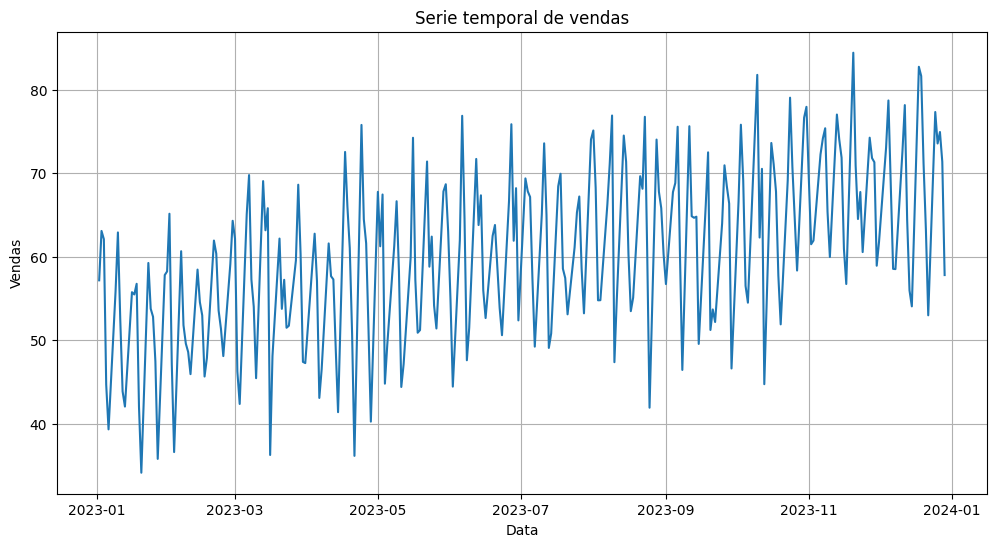

In [ ]:
# Gráfico da série temporal (sem formatação)
plt.figure (figsize = (12,6))
plt.plot(serie_temporal)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Serie temporal de vendas')
plt.grid(True)
plt.show()

# Comportamento maior e menor de vendas
# 4 componentes: serie,tendencia,sazonalidade e ruido

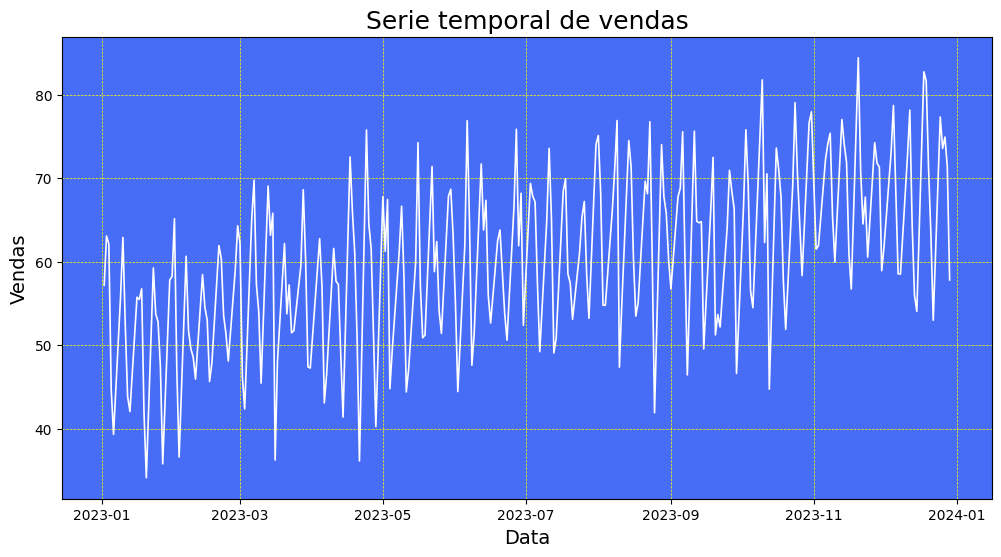

In [ ]:
# Gráfico da série temporal (com formatação)

# Layout de contraste
plt.figure (figsize = (12,6))
plt.plot(serie_temporal, color = 'white', linewidth = 1.2)

# Cores e estilo do gráfico
plt.gca().set_facecolor('#476CF5')
plt.grid(color = 'yellow', linestyle = '--', linewidth = 0.5)

# Rótulos dos eixos, título e legenda
plt.xlabel('Data', color = 'black', fontsize = 14)
plt.ylabel('Vendas', color = 'black', fontsize = 14)
plt.title('Serie temporal de vendas', color = 'black', fontsize = 18)

# Eixos e ticks (marcadores)
plt.tick_params(axis = 'x', colors ='black')
plt.tick_params(axis = 'y', colors ='black')

plt.show()